Сохраните ваше решение в формате Name_Surname.ipynb, например Ivan_Ivanov.ipynb

# Линейная регрессия

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [163]:
%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/analekseev/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

In [205]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [145]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разделим выборку на обчающую и тестовую в отоншении 8/2:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод score).

In [112]:
lr = LinearRegression().fit(x_train, y_train)
print(f'Score for LinearRegression {lr.score(x_test, y_test)}')
lr_ridge = Ridge().fit(x_train, y_train)
print(f'Score for Ridge {lr_ridge.score(x_test, y_test)}')
lr_lasso = Lasso().fit(x_train, y_train)
print(f'Score for Lasso {lr_lasso.score(x_test, y_test)}')

Score for LinearRegression 0.6687594935356329
Score for Ridge 0.6662221670168518
Score for Lasso 0.6671453631686304


__Задание 2.__ Подбор гиперпараметров.

**(2 балла)**

Для Lasso- и Ridge-регресий подберите коэффициет регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

In [113]:
log = np.log(10e6)
reg = np.logspace(-log, log, 15)

In [119]:
lr_ridge = Ridge()
ridge_test_score = []
ridge_train_score = []
for i in reg:
    lr_ridge = RidgeCV(alphas=[i], cv=5)
    lr_ridge.fit(x_train, y_train)
    ridge_train_score.append(lr_ridge.score(x_train, y_train))
    ridge_test_score.append(lr_ridge.score(x_test, y_test))

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [117]:
lr_lasso = Lasso()
num_of_null = []
lasso_test_score = []
lasso_train_score = []
for i in reg:
    lr_lasso = LassoCV(alphas=[i], cv=5)
    lr_lasso.fit(x_train, y_train)
    num_of_null.append((lr_lasso.coef_ == 0).sum())
    lasso_train_score.append(lr_lasso.score(x_train, y_train))
    lasso_test_score.append(lr_lasso.score(x_test, y_test))

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727.5035379293604, tolerance: 2.882109046439629
  tol, rng, random, positive)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3015.290065397132, tolerance: 2.764448730650155
  tol, rng, random, positive)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3450.7846702911133, tolerance: 2.710494922600619
  tol, rng, random, positive)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: Convergenc

Пстройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

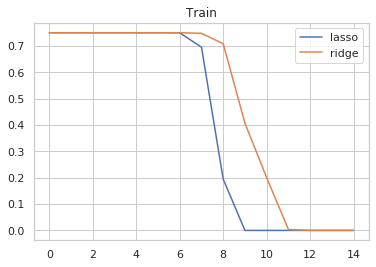

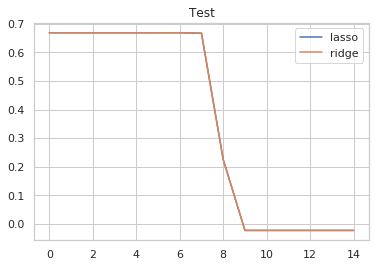

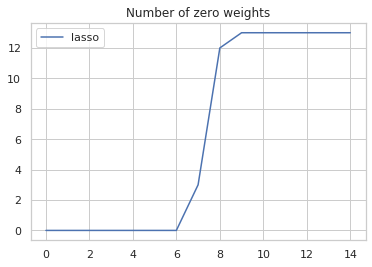

In [124]:
plot(lasso_train_score, label='lasso')
plot(ridge_train_score, label='ridge')
title('Train')
legend()
show()

plot(lasso_test_score, label='lasso')
plot(lasso_test_score, label='ridge')
title('Test')
legend()
show()

plot(num_of_null, label='lasso')
title('Number of zero weights')
legend()
show()

В какой момент происходит недообучение? Почему?

__Ответ__: недообучение происходит при достижении регуляризатора >= 8. Тк весам выгодно находится в нуле. Для лассо этот эффект более значимый, тк при даже для весов > 1 величина эффекта линейна, тогда как у ridge квадратична.

---

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Нормализация.

__(2 балл)__

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить нормализацию к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

In [128]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [129]:
scaled_df = StandardScaler().fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, train_size=0.8, random_state=42)

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после нормализации. Изменилось ли оно? Предположите почему так могло произойти.

In [130]:
lr_ridge_scaled = Ridge()
ridge_scaled_test_score = []
ridge_scaled_train_score = []
for i in reg:
    lr_ridge_scaled = RidgeCV(alphas=[i], cv=5)
    lr_ridge_scaled.fit(x_train, y_train)
    ridge_scaled_train_score.append(lr_ridge_scaled.score(x_train, y_train))
    ridge_scaled_test_score.append(lr_ridge_scaled.score(x_test, y_test))

In [138]:
print(f'Значение регуляризатора для scaled модели {reg[ridge_scaled_test_score.index(max(ridge_scaled_test_score))]}')

Значение регуляризатора для scaled модели 7.619111848191375e-17


In [139]:
print(f'Значение регуляризатора для простой модели {reg[ridge_test_score.index(max(ridge_test_score))]}')

Значение регуляризатора для простой модели 200.7174324905306


__Ответ:__ Теперь признаки вносят одинаковый вклад тк все они нормированы. Для просто же модели некоторые признаки вносили значительно больший вклад при этом не являясь важными.

__Задание 4.__ Новые признаки.

__(2 балла)__

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

In [ ]:
df['new_LSTAT'] = np.log(df['LSTAT'])

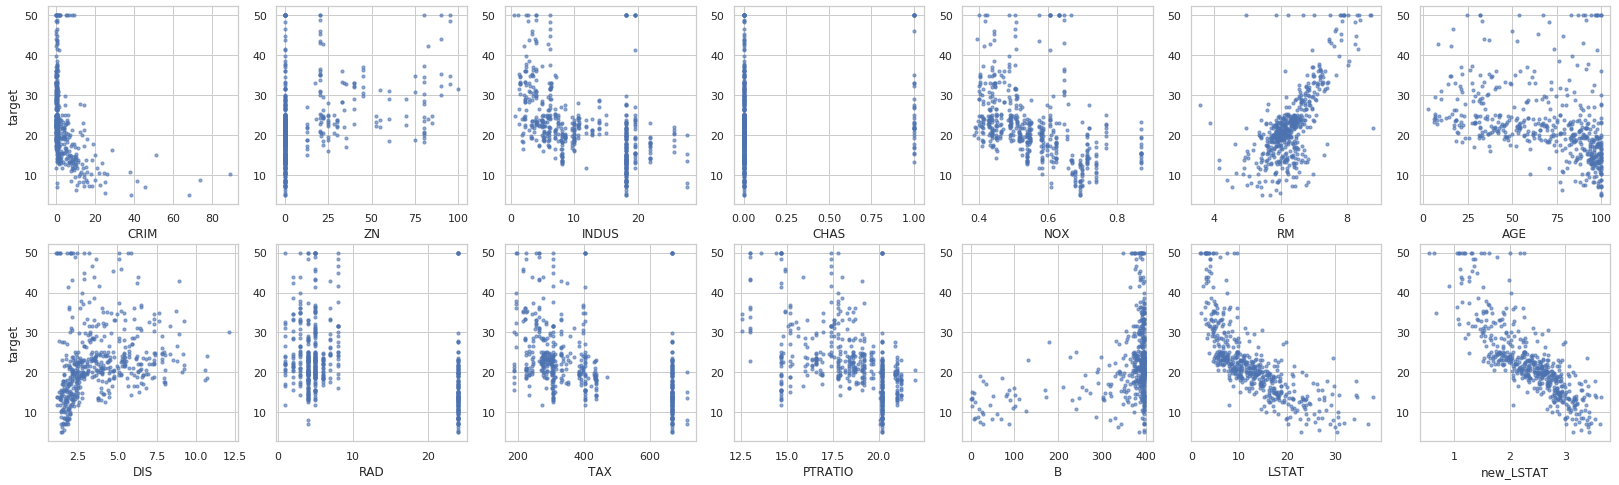

In [154]:
pairplot(df, y)

In [158]:
scaled_df = StandardScaler().fit_transform(df.drop(columns=['LSTAT']))

In [159]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, train_size=0.8, random_state=42)

In [160]:
lr_ridge_scaled = Ridge()
ridge_scaled_test_score = []
ridge_scaled_train_score = []
for i in reg:
    lr_ridge_scaled = RidgeCV(alphas=[i], cv=5)
    lr_ridge_scaled.fit(x_train, y_train)
    ridge_scaled_train_score.append(lr_ridge_scaled.score(x_train, y_train))
    ridge_scaled_test_score.append(lr_ridge_scaled.score(x_test, y_test))

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/skl

In [162]:
print(f'Максимальное значение на тестовой выборке {max(ridge_scaled_test_score)}')

Максимальное значение на тестовой выборке 0.7450302434403303


Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

__Ответ:__

Помимо преобразований отдельный признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [167]:
poly = PolynomialFeatures(degree=2)

In [178]:
poly_scaled_df = poly.fit_transform(scaled_df)
x_train, x_test, y_train, y_test = train_test_split(poly_scaled_df, y, train_size=0.8, random_state=42)

In [179]:
ridge_scaled_test_score = []
ridge_scaled_train_score = []
for i in reg:
    lr_ridge_scaled = RidgeCV(alphas=[i], cv=5)
    lr_ridge_scaled.fit(x_train, y_train)
    ridge_scaled_train_score.append(lr_ridge_scaled.score(x_train, y_train))
    ridge_scaled_test_score.append(lr_ridge_scaled.score(x_test, y_test))

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09461e-21): result may not be accurate.
  overwrite_a=True).T
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94267e-21): result may not be accurate.
  overwrite_a=True).T
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1681e-21): result may not be accurate.
  overwrite_a=True).T
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15296e-21): result may not be accurate.
  overwrite_a=True).T
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20424e-19): result may not be accurate.
  overwrite_a=True).T
/home/

In [180]:
print(f'Максимальное значение на тестовой выборке {max(ridge_scaled_test_score)}')

Максимальное значение на тестовой выборке 0.8039112599923345


__Задание 5.__ Оптимальная архитектура, анализ.

__(3 балла)__

При помощи `Pipeline` и `GridSearchSCV` выберите оптимальную архитектуру комбинируя различные методы нормализации, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимищация сошлась.

In [226]:
scaled_df = StandardScaler().fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, train_size=0.8, random_state=42)

In [227]:
poly = PolynomialFeatures()
ridge = Ridge()
lasso = Lasso()
pipeline_ridge = Pipeline([('poly', poly), ('model', ridge)])
pipeline_lasso = Pipeline([('poly', poly), ('model', lasso)])

In [228]:
param_grid = {'poly__degree': [1, 2, 3], 'model__alpha': [0, 0.5, 1, 5, 10], 'model__max_iter':[100000]}

In [229]:
GS_ridge = GridSearchCV(pipeline_ridge, param_grid)
GS_ridge.fit(x_train, y_train)

GS_lasso = GridSearchCV(pipeline_lasso, param_grid)
GS_lasso.fit(x_train, y_train)

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem.

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False

In [230]:
print(f'R^2 на тестовой выборке при ridge {GS_ridge.score(x_test, y_test)}')
print(f'R^2 на тестовой выборке при lasso {GS_lasso.score(x_test, y_test)}')

R^2 на тестовой выборке при ridge 0.8177144208152569
R^2 на тестовой выборке при lasso 0.8084725090296798


In [231]:
min_max_scaled_df = MinMaxScaler().fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(min_max_scaled_df, y, train_size=0.8, random_state=42)
GS_ridge_min_max = GridSearchCV(pipeline_ridge, param_grid)
GS_ridge_min_max.fit(x_train, y_train)

GS_lasso_min_max = GridSearchCV(pipeline_lasso, param_grid)
GS_lasso_min_max.fit(x_train, y_train)

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.901e-17): result may not be accurate.
  overwrite_a=False)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/analekseev/anaconda3/lib/python3.7/si

/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:356: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/analekseev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False

In [232]:
print(f'R^2 на тестовой выборке при min_max и ridge {GS_ridge_min_max.score(x_test, y_test)}')
print(f'R^2 на тестовой выборке при min_max и lasso {GS_lasso_min_max.score(x_test, y_test)}')

R^2 на тестовой выборке при min_max и ridge 0.8596516632069354
R^2 на тестовой выборке при min_max и lasso 0.806728925729334


Для одной комбинаций нормализации и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [243]:
results = pd.DataFrame()
results['test_score'] = GS_ridge_min_max.cv_results_['mean_test_score']
results['poly'] = GS_ridge_min_max.cv_results_['param_poly__degree'].data
results['alpha'] = GS_ridge_min_max.cv_results_['param_model__alpha'].data

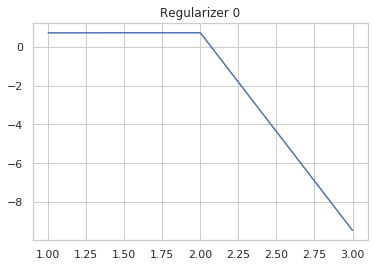

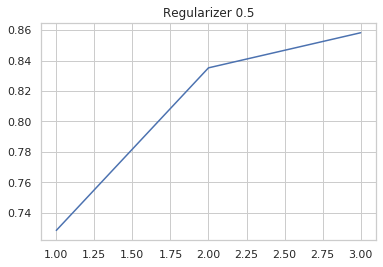

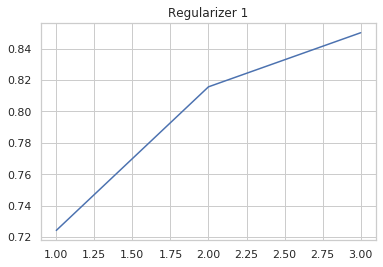

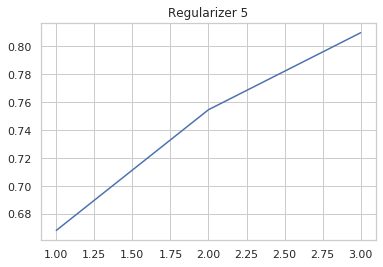

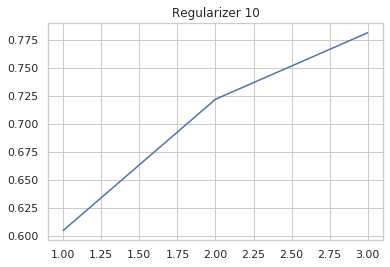

In [259]:
for j in results.alpha.unique():
    to_plot = []
    for i in results.poly.unique():
        to_plot.append(results[(results['poly'] == i)&(results['alpha'] == j)]['test_score'].values)
    plot(results.poly.unique(), to_plot)
    title(f'Regularizer {j}')
    show()

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__ Для больших значений регуляризатора недообучение происходит при малых значениях полинома, тк веса зажимаются регуляризатором. При большом значении полинома R^2 выше, должно быть, благодаря тому, что функция ошибки начинает играть большую роль, чем регуляризатор и модели выгоднее иметь более разнообразные веса, а не занулять их. При зачении регуляризатора 0, при полиноме степени 3 видна типичная картина переобучения. Модель запоминает локальный шум в данных и перестает обобщать данные, что выливается в плохой результат работы модели на тестовых данных.